In [205]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds
using LCPSim
# using Ipopt
using ConditionalJuMP
using Gurobi
using RigidBodyTreeInspector
using DrakeVisualizer

using Plots

In [2]:
urdf = joinpath("..","urdf", "brick.urdf")
mechanism = parse_urdf(Float64, urdf)

body = findbody(mechanism, "brick")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)

position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100);

In [185]:
DrakeVisualizer.any_open_windows() || (DrakeVisualizer.new_window(); sleep(1));
geometries = visual_elements(mechanism, URDFVisuals(urdf))
vis = Visualizer(mechanism, geometries);

In [216]:
x0 = MechanismState(mechanism)
set_configuration!(x0, [1., 0., 0., 0., 0., 0., -.3])
set_velocity!(x0, [0., 1., 0., 0., 1. , 0.])
setdirty!(x0)
env = LCPSim.parse_contacts(mechanism, urdf);
controller = LCPSim.passive_controller()
Δt = 0.01
N = 20

20

In [217]:
results = LCPSim.simulate(x0, controller, env, Δt, N)

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      169
Number of nonzeros in inequality constraint Jacobian.:       52
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       13
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       13
                     variables with only upper bounds:        0
Total number of equality constraints.................:       13
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        4
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

13×21 Array{Float64,2}:
  1.0   1.0           0.999972      0.999915     …   0.994877     0.994423  
  0.0   1.13771e-5    3.42683e-5    6.88084e-5       0.00132406   0.00152306
  0.0   0.00517841    0.0105142     0.0159859        0.103092     0.107305  
  0.0  -6.80346e-5   -0.000203946  -0.00040757      -0.0127777   -0.0141145 
  0.0   0.000148027   0.000418754   0.000786167     -0.00292422  -0.00519721
  0.0   0.00981397    0.0194413     0.0288815    …   0.153331     0.159379  
 -0.3  -0.303891     -0.311675     -0.323353        -0.408101    -0.404845  
  0.0   0.00227542    0.00464639    0.00711304       0.0677587    0.0732312 
  1.0   1.03568       1.06718       1.09439          0.899486     0.847741  
  0.0  -0.0136069    -0.0271707    -0.0406898       -0.249782    -0.262369  
  0.0   0.0148027     0.0350019     0.060904     …   1.24371      1.34897   
  1.0   0.981397      0.962723      0.943958         0.620987     0.598732  
  0.0  -0.389116     -0.778104     -1.16684         

In [224]:
qs = [results[1:num_positions(x0),i] for i in 1:N]
ts = cumsum([Δt for i in 1:N]);
RigidBodyTreeInspector.animate(vis, mechanism, ts, qs; realtimerate = .25);

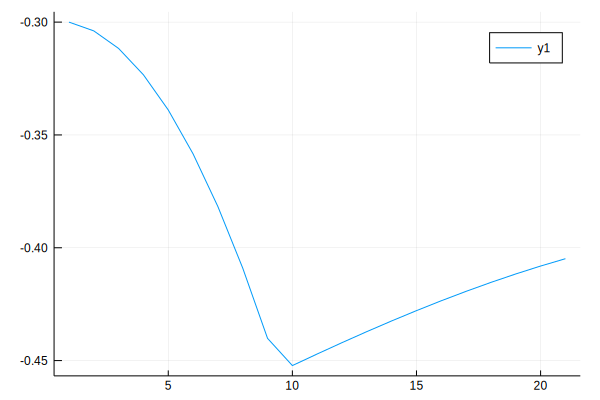

In [225]:
plot(results[7,:])

In [11]:
q = [1., 0., 0., 0., 0., 0., 2.]
v = [0., 0., 0., 0., 0. , 0.]
u = [0., 0., 0., 0., 0. , 0.]
eval_g, eval_jac_g = update_constraints_implicit(env,mechanism,Δt,q,v,u)

(LCPSim.eval_g, LCPSim.eval_jac_g)

In [5]:
x = rand(length(q)+length(v))
g = zeros(length(x)+length(env.contacts))
eval_g(x, g)
values = zeros(length(g)*length(x))
eval_jac_g(x, :Eval, [], [], values)

221-element Array{Float64,1}:
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 1.0        
 0.0        
 0.0        
 0.0        
 2.00195e-12
 0.0        
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

In [19]:
qs = [configuration(r.state) for r in results]
ts = cumsum([r.Δt for r in results]);
for q in qs
    println(q)
end
# println(qs)
# plot([q[7] for q in qs])

LoadError: [91mtype Float64 has no field state[39m

In [20]:
results

13×11 Array{Float64,2}:
 1.0   1.0       1.0       1.0       1.0      …   1.0       1.0       1.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0      …   0.0       0.0       0.0    
 2.0   1.99902   1.99706   1.99411   1.99019      1.96468   1.95586   1.94605
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0      …   0.0       0.0       0.0    
 0.0   0.0       0.0       0.0       0.0          0.0       0.0       0.0    
 0.0  -0.0981   -0.1962   -0.2943   -0.3

In [28]:
qs = [results[1:num_positions(x0),i] for i in 1:N]
ts = cumsum([Δt for i in 1:N]);

In [28]:
qs

10-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]    
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99902]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99706]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99411]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99019]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.98529]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9794] 
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.97253]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.96468]
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.95586]

In [70]:
q0 = [1., 0., 0., 0., 0., 0., 2.]
v0 = [0., 1., 0., 0., 1. , 0.]
x0 = MechanismState(mechanism)
set_configuration!(x0, q0)
set_velocity!(x0, v0)
env = LCPSim.parse_contacts(mechanism, urdf);
controller = LCPSim.passive_controller()
Δt = 0.01
qnext = [1., 0., 0., 0., 0., 0., 2.]
vnext = [0., 1., 0., 0., 1. , 0.]
τ_contact_wrenches(env,mechanism,Δt,x0,qnext,vnext)

6-element Array{Float64,1}:
  0.00140765 
 -0.00279128 
  1.24345e-14
 -0.00349114 
  0.00348719 
 -9.80353    

In [119]:
q0 = [1., 0., 0., 0., 0., 0., 2.]
v0 = [0., 1., 0., 0., 1. , 0.]
x0 = MechanismState(mechanism)
set_configuration!(x0, q0)
set_velocity!(x0, v0)
num_q = length(q0)
num_v = length(v0)
qnext = [1., 0., 0., 0., 0., 0., 2.]
vnext = [0., 1., 0., 0., 1. , 0.]
# τ_contact_wrenches(env,mechanism,Δt,x0,qnext,vnext)
ForwardDiff.jacobian(x -> τ_contact_wrenches(env,mechanism,Δt,x0,x[1:num_q],x[num_q+1:num_q+num_v]),vcat(qnext,vnext))

6×13 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -377.246           0.0  
 0.0  0.0  0.0  0.0  0.0  0.0  0.0        2.30996e-14     0.0  
 0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0             0.0  
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       -4.61993e-14     0.0  
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     -754.491           0.0  
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …     0.0          -377.246

In [37]:
n = 5
x = zeros(n)
f = x -> x'*x
h = x -> [0.]
g = x -> 5. - x
num_h = length(h(x))
num_g = length(g(x))
N = 5
α = 1.
I = 1e-12
augmented_lagrangian_newton!(x,f,h,g,num_h,num_g,N,α,I)

[4.91176, 4.91176, 4.91176, 4.91176, 4.91176]
[4.99913, 4.99913, 4.99913, 4.99913, 4.99913]
[5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0]


In [18]:
λ = ones(num_h)
μ = ones(num_g)
c = .01
L = (x,λ,μ,c) -> (f(x) + dot(λ,h(x)) + .5*c*dot(h(x),h(x)) + 1./(2.*c)*sum(max.([0.],μ.+c*g(x)).^2 - μ.^2))[1]
∇xL = (x,λ,μ,c) -> ForwardDiff.gradient(x̃ -> L(x̃,λ,μ,c),x)
HxL = (x,λ,μ,c) -> ForwardDiff.jacobian(x̃ -> ∇xL(x̃,λ,μ,c),x)
HxL(x,λ,μ,c)

5×5 Array{Float64,2}:
 2.01  0.0   0.0   0.0   0.0 
 0.0   2.01  0.0   0.0   0.0 
 0.0   0.0   2.01  0.0   0.0 
 0.0   0.0   0.0   2.01  0.0 
 0.0   0.0   0.0   0.0   2.01